## Merge

In [1]:
import pandas as pd
import numpy as np

In [7]:
df1 = pd.DataFrame({'city':['bangalore','delhi','mumbai'], 'temperature':[30, 38, 26]})
df1

,city,temperature
0,bangalore,30
1,delhi,38
2,mumbai,26


In [8]:
df2 = pd.DataFrame({
    'city':['bangalore','chennai','delhi'],
    'humidity':[40,80,74]
})
df2

,city,humidity
0,bangalore,40
1,chennai,80
2,delhi,74


In [9]:
pd.merge(df1, df2, on='city')        # default is inner join

,city,temperature,humidity
0,bangalore,30,40
1,delhi,38,74


In [10]:
pd.merge(df1, df2, on='city', how='outer')

,city,temperature,humidity
0,bangalore,30.0,40.0
1,delhi,38.0,74.0
2,mumbai,26.0,NaN
3,chennai,NaN,80.0


In [11]:
pd.merge(df1, df2, how='left')

,city,temperature,humidity
0,bangalore,30,40.0
1,delhi,38,74.0
2,mumbai,26,NaN


In [13]:
pd.merge(df1, df2)

,city,temperature,humidity
0,bangalore,30,40
1,delhi,38,74


## Handling Missing date: fillna, interpolate, dropna

In [18]:
df = pd.read_csv('cities.csv', nrows=8)
df

,LatD,"""LatM""","""LatS""","""NS""","""LonD""","""LonM""","""LonS""","""EW""","""City""","""State"""
0,41,5,59,"""N""",80,39,0,"""W""","""Youngstown""",OH
1,42,52,48,"""N""",97,23,23,,"""Yankton""",SD
2,46,35,59,,120,30,36,"""W""","""Yakima""",WA
3,42,16,12,"""N""",71,48,0,"""W""","""Worcester""",MA
4,43,,48,"""N""",89,46,11,"""W""","""Wisconsin Dells""",WI
5,36,5,,"""N""",80,,0,"""W""","""Winston-Salem""",NC
6,49,52,48,"""N""",97,9,0,,"""Winnipeg""",MB
7,39,11,,"""N""",78,9,36,"""W""","""Winchester""",VA


In [28]:
df.replace('^\s*$',np.nan,regex=True,inplace=True)            # use regex to replace all spaces(blanks) with NaN

In [29]:
df

,LatD,"""LatM""","""LatS""","""NS""","""LonD""","""LonM""","""LonS""","""EW""","""City""","""State"""
0,41,5,59,"""N""",80,39,0,"""W""","""Youngstown""",OH
1,42,52,48,"""N""",97,23,23,NaN,"""Yankton""",SD
2,46,35,59,NaN,120,30,36,"""W""","""Yakima""",WA
3,42,16,12,"""N""",71,48,0,"""W""","""Worcester""",MA
4,43,NaN,48,"""N""",89,46,11,"""W""","""Wisconsin Dells""",WI
5,36,5,NaN,"""N""",80,NaN,0,"""W""","""Winston-Salem""",NC
6,49,52,48,"""N""",97,9,0,NaN,"""Winnipeg""",MB
7,39,11,NaN,"""N""",78,9,36,"""W""","""Winchester""",VA


In [32]:
newdf = df.fillna(0)

In [33]:
newdf

,LatD,"""LatM""","""LatS""","""NS""","""LonD""","""LonM""","""LonS""","""EW""","""City""","""State"""
0,41,5,59,"""N""",80,39,0,"""W""","""Youngstown""",OH
1,42,52,48,"""N""",97,23,23,0,"""Yankton""",SD
2,46,35,59,0,120,30,36,"""W""","""Yakima""",WA
3,42,16,12,"""N""",71,48,0,"""W""","""Worcester""",MA
4,43,0,48,"""N""",89,46,11,"""W""","""Wisconsin Dells""",WI
5,36,5,0,"""N""",80,0,0,"""W""","""Winston-Salem""",NC
6,49,52,48,"""N""",97,9,0,0,"""Winnipeg""",MB
7,39,11,0,"""N""",78,9,36,"""W""","""Winchester""",VA


In [43]:
newdf2 = df.fillna({
    '"EW"' : "W",
    '"LatM"' : 0, 
    '"LatS"' : 0,
    '"LonM"' : 0
})
newdf2

,LatD,"""LatM""","""LatS""","""NS""","""LonD""","""LonM""","""LonS""","""EW""","""City""","""State"""
0,41,5,59,"""N""",80,39,0,"""W""","""Youngstown""",OH
1,42,52,48,"""N""",97,23,23,NaN,"""Yankton""",SD
2,46,35,59,NaN,120,30,36,"""W""","""Yakima""",WA
3,42,16,12,"""N""",71,48,0,"""W""","""Worcester""",MA
4,43,NaN,48,"""N""",89,46,11,"""W""","""Wisconsin Dells""",WI
5,36,5,NaN,"""N""",80,NaN,0,"""W""","""Winston-Salem""",NC
6,49,52,48,"""N""",97,9,0,NaN,"""Winnipeg""",MB
7,39,11,NaN,"""N""",78,9,36,"""W""","""Winchester""",VA


In [44]:
df.columns

Index(['LatD', ' "LatM"', ' "LatS"', ' "NS"', ' "LonD"', ' "LonM"', ' "LonS"',
       ' "EW"', ' "City"', ' "State"'],
      dtype='object')

In [45]:
# above fillna using dictionary should have worked, but it didnt

In [46]:
df

,LatD,"""LatM""","""LatS""","""NS""","""LonD""","""LonM""","""LonS""","""EW""","""City""","""State"""
0,41,5,59,"""N""",80,39,0,"""W""","""Youngstown""",OH
1,42,52,48,"""N""",97,23,23,NaN,"""Yankton""",SD
2,46,35,59,NaN,120,30,36,"""W""","""Yakima""",WA
3,42,16,12,"""N""",71,48,0,"""W""","""Worcester""",MA
4,43,NaN,48,"""N""",89,46,11,"""W""","""Wisconsin Dells""",WI
5,36,5,NaN,"""N""",80,NaN,0,"""W""","""Winston-Salem""",NC
6,49,52,48,"""N""",97,9,0,NaN,"""Winnipeg""",MB
7,39,11,NaN,"""N""",78,9,36,"""W""","""Winchester""",VA


In [47]:
newdf

,LatD,"""LatM""","""LatS""","""NS""","""LonD""","""LonM""","""LonS""","""EW""","""City""","""State"""
0,41,5,59,"""N""",80,39,0,"""W""","""Youngstown""",OH
1,42,52,48,"""N""",97,23,23,0,"""Yankton""",SD
2,46,35,59,0,120,30,36,"""W""","""Yakima""",WA
3,42,16,12,"""N""",71,48,0,"""W""","""Worcester""",MA
4,43,0,48,"""N""",89,46,11,"""W""","""Wisconsin Dells""",WI
5,36,5,0,"""N""",80,0,0,"""W""","""Winston-Salem""",NC
6,49,52,48,"""N""",97,9,0,0,"""Winnipeg""",MB
7,39,11,0,"""N""",78,9,36,"""W""","""Winchester""",VA


In [49]:
df3 = df.fillna(method='ffill')        # forward fill
df3

,LatD,"""LatM""","""LatS""","""NS""","""LonD""","""LonM""","""LonS""","""EW""","""City""","""State"""
0,41,5,59,"""N""",80,39,0,"""W""","""Youngstown""",OH
1,42,52,48,"""N""",97,23,23,"""W""","""Yankton""",SD
2,46,35,59,"""N""",120,30,36,"""W""","""Yakima""",WA
3,42,16,12,"""N""",71,48,0,"""W""","""Worcester""",MA
4,43,16,48,"""N""",89,46,11,"""W""","""Wisconsin Dells""",WI
5,36,5,48,"""N""",80,46,0,"""W""","""Winston-Salem""",NC
6,49,52,48,"""N""",97,9,0,"""W""","""Winnipeg""",MB
7,39,11,48,"""N""",78,9,36,"""W""","""Winchester""",VA


In [50]:
df.fillna(method='bfill', limit=1)

,LatD,"""LatM""","""LatS""","""NS""","""LonD""","""LonM""","""LonS""","""EW""","""City""","""State"""
0,41,5,59,"""N""",80,39,0,"""W""","""Youngstown""",OH
1,42,52,48,"""N""",97,23,23,"""W""","""Yankton""",SD
2,46,35,59,"""N""",120,30,36,"""W""","""Yakima""",WA
3,42,16,12,"""N""",71,48,0,"""W""","""Worcester""",MA
4,43,5,48,"""N""",89,46,11,"""W""","""Wisconsin Dells""",WI
5,36,5,48,"""N""",80,9,0,"""W""","""Winston-Salem""",NC
6,49,52,48,"""N""",97,9,0,"""W""","""Winnipeg""",MB
7,39,11,NaN,"""N""",78,9,36,"""W""","""Winchester""",VA


In [51]:
df

,LatD,"""LatM""","""LatS""","""NS""","""LonD""","""LonM""","""LonS""","""EW""","""City""","""State"""
0,41,5,59,"""N""",80,39,0,"""W""","""Youngstown""",OH
1,42,52,48,"""N""",97,23,23,NaN,"""Yankton""",SD
2,46,35,59,NaN,120,30,36,"""W""","""Yakima""",WA
3,42,16,12,"""N""",71,48,0,"""W""","""Worcester""",MA
4,43,NaN,48,"""N""",89,46,11,"""W""","""Wisconsin Dells""",WI
5,36,5,NaN,"""N""",80,NaN,0,"""W""","""Winston-Salem""",NC
6,49,52,48,"""N""",97,9,0,NaN,"""Winnipeg""",MB
7,39,11,NaN,"""N""",78,9,36,"""W""","""Winchester""",VA


In [56]:
df1 = df.interpolate(method='linear')                           # not working (why?)
df1

,LatD,"""LatM""","""LatS""","""NS""","""LonD""","""LonM""","""LonS""","""EW""","""City""","""State"""
0,41,5,59,"""N""",80,39,0,"""W""","""Youngstown""",OH
1,42,52,48,"""N""",97,23,23,NaN,"""Yankton""",SD
2,46,35,59,NaN,120,30,36,"""W""","""Yakima""",WA
3,42,16,12,"""N""",71,48,0,"""W""","""Worcester""",MA
4,43,NaN,48,"""N""",89,46,11,"""W""","""Wisconsin Dells""",WI
5,36,5,NaN,"""N""",80,NaN,0,"""W""","""Winston-Salem""",NC
6,49,52,48,"""N""",97,9,0,NaN,"""Winnipeg""",MB
7,39,11,NaN,"""N""",78,9,36,"""W""","""Winchester""",VA


In [58]:
ddf = df.dropna()               # if row has even 1 NaN value, it gets dropped
ddf

,LatD,"""LatM""","""LatS""","""NS""","""LonD""","""LonM""","""LonS""","""EW""","""City""","""State"""
0,41,5,59,"""N""",80,39,0,"""W""","""Youngstown""",OH
3,42,16,12,"""N""",71,48,0,"""W""","""Worcester""",MA


## Groupby

In [74]:
df = pd.read_csv('data.txt', sep='	')
df

,animal,age,weight,length
0,hamster,1,7,8
1,alligator,9,13,6
2,hamster,4,8,9
3,cat,13,12,1
4,snake,14,11,8
5,cat,10,8,9
6,hamster,2,10,5
7,cat,4,14,6
8,cat,14,9,6
9,snake,7,11,6


In [87]:
df.sort_values(by='animal')

,animal,age,weight,length
1,alligator,9,13,6
13,alligator,7,14,5
3,cat,13,12,1
5,cat,10,8,9
7,cat,4,14,6
8,cat,14,9,6
12,cat,1,9,4
0,hamster,1,7,8
2,hamster,4,8,9
6,hamster,2,10,5


In [90]:
df.sort_values(by='animal',ignore_index='True', inplace=True)          #ignore index will give it new index after sorting

In [91]:
df

,animal,age,weight,length
0,alligator,9,13,6
1,alligator,7,14,5
2,cat,13,12,1
3,cat,10,8,9
4,cat,4,14,6
5,cat,14,9,6
6,cat,1,9,4
7,hamster,1,7,8
8,hamster,4,8,9
9,hamster,2,10,5


In [94]:
g = df.groupby('animal')
g

In [98]:
for animal, animal_df in g:
    print(animal)
    print(animal_df,end='\n\n')

alligator
      animal  age  weight  length
0  alligator    9      13       6
1  alligator    7      14       5

cat
  animal  age  weight  length
2    cat   13      12       1
3    cat   10       8       9
4    cat    4      14       6
5    cat   14       9       6
6    cat    1       9       4

hamster
     animal  age  weight  length
7   hamster    1       7       8
8   hamster    4       8       9
9   hamster    2      10       5
10  hamster   14      10       5
11  hamster    2      10       3

snake
   animal  age  weight  length
12  snake   14      11       8
13  snake    7      11       6



In [99]:
g.get_group('hamster')

,animal,age,weight,length
7,hamster,1,7,8
8,hamster,4,8,9
9,hamster,2,10,5
10,hamster,14,10,5
11,hamster,2,10,3


In [100]:
g.describe()


age                                               weight        \
          count  mean       std  min   25%   50%    75%   max  count  mean   
animal                                                                       
alligator   2.0   8.0  1.414214  7.0  7.50   8.0   8.50   9.0    2.0  13.5   
cat         5.0   8.4  5.683309  1.0  4.00  10.0  13.00  14.0    5.0  10.4   
hamster     5.0   4.6  5.366563  1.0  2.00   2.0   4.00  14.0    5.0   9.0   
snake       2.0  10.5  4.949747  7.0  8.75  10.5  12.25  14.0    2.0  11.0   

           ...              length                                            
           ...    75%   max  count mean       std  min   25%  50%   75%  max  
animal     ...                                                                
alligator  ...  13.75  14.0    2.0  5.5  0.707107  5.0  5.25  5.5  5.75  6.0  
cat        ...  12.00  14.0    5.0  5.2  2.949576  1.0  4.00  6.0  6.00  9.0  
hamster    ...  10.00  10.0    5.0  6.0  2.449490  3.0  5.00  5.0  8.00  9.0  
snake      ...  11.00  11.0    2.0  7.0  1.414214  6.0  6.50  7.0  7.50  8.0  

[4 rows x 24 columns]

In [101]:
g.max()


,age,weight,length
animal,,,
alligator,9,14,6
cat,14,14,9
hamster,14,10,9
snake,14,11,8


animal
alligator    AxesSubplot(0.125,0.125;0.775x0.755)
cat          AxesSubplot(0.125,0.125;0.775x0.755)
hamster      AxesSubplot(0.125,0.125;0.775x0.755)
snake        AxesSubplot(0.125,0.125;0.775x0.755)
dtype: object

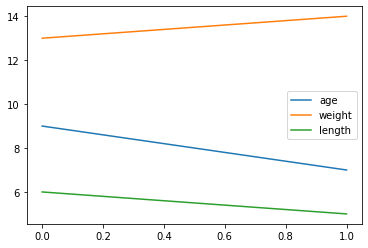

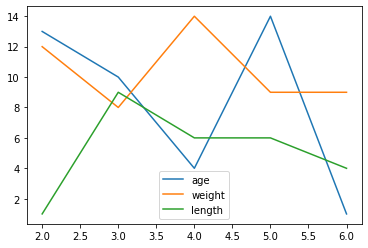

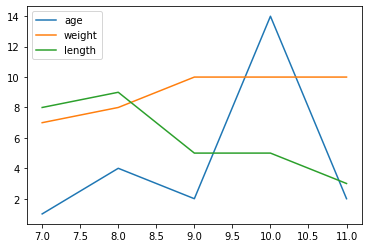

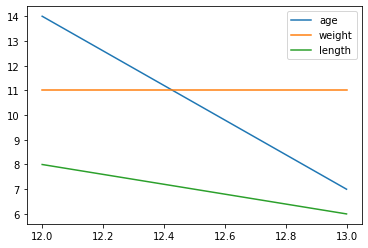

In [102]:
%matplotlib inline
g.plot()                              # 4 plots; one plot for each of the animals of the group